# exploring_training_data.ipynb

This notebook will soley focus on exploring the training data to find some relationships. We will develop plots and try to see how we can decrease our feature set (189 features!).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Getting the data
raw_data = pd.read_csv('/Users/jinalshah/Jinal/Projects/march-madness-mania/preprocessed-data/modeling-data/training.csv',index_col=0)

# Making sure the data loaded properly

,Season,A_TeamID,A_Wins,A_Losses,A_Winning Percentage,A_Score_mean,A_FGM_mean,A_FGA_mean,A_FGM3_mean,A_FGA3_mean,...,B_DRPercent_std,B_AssistToTurnoverRatio_std,B_Possessions_std,B_OffEff_std,B_DefEff_std,B_TO%_std,B_PointDiff_std,B_OffensiveRating_std,B_DefensiveRating_std,LowerWin?
1057,2019,1242,25,9,0.735294,75.382353,27.294118,59.058824,7.235294,20.647059,...,0.085358,0.881175,7.485740,25.135399,45.694237,0.139550,12.276641,62672.908339,241.659481,1
389,2009,1268,20,13,0.606061,71.454545,26.242424,62.242424,5.757576,17.393939,...,0.078869,0.705547,6.655313,24.918983,39.047405,0.144828,14.982651,74734.666567,214.844435,0
462,2010,1437,24,7,0.774194,82.548387,27.612903,59.419355,7.709677,20.483871,...,0.087327,0.424403,7.100498,37.001408,50.488806,0.204308,14.494452,69761.901114,327.624674,0
575,2011,1433,23,11,0.676471,71.529412,24.264706,55.764706,8.176471,22.764706,...,0.077266,0.637593,7.101537,35.161898,40.164503,0.164143,15.802057,79118.599885,797.290386,0
559,2011,1242,32,2,0.941176,82.382353,29.588235,57.617647,7.264706,18.764706,...,0.093458,0.415947,6.181710,39.174879,40.158152,0.132475,13.114723,90093.042575,502.405852,0


In [3]:
# Displaying data shape to see what we are working with
print(f'Data Shape: {raw_data.shape}')

Data Shape: (1606, 190)


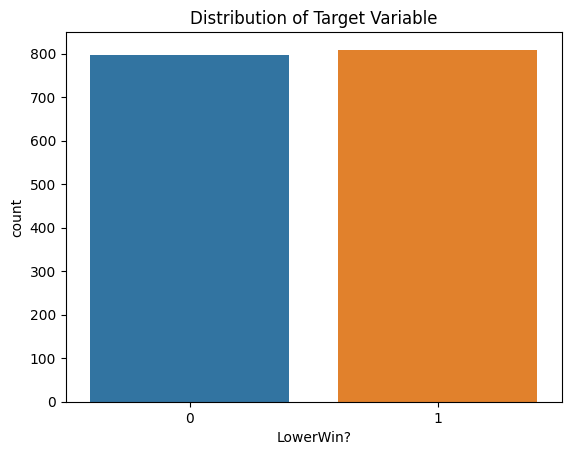

In [6]:
# Seeing what the distribution of lower team wins is (how many times did the lower team win?)
sns.countplot(data=raw_data,x='LowerWin?',orient='v')
plt.title('Distribution of Target Variable')
plt.savefig('/Users/jinalshah/Jinal/Projects/march-madness-mania/visualizations/target_dist.png')
plt.show()

In [7]:
# Seeing the actual counts because plot shows an even split
raw_data['LowerWin?'].value_counts()

1    809
0    797
Name: LowerWin?, dtype: int64

In [13]:
raw_data[['A_TeamID','B_TeamID']].min(axis=1)

1057    1242
389     1143
462     1352
575     1242
559     1228
        ... 
550     3113
37      3246
51      3211
596     3390
65      3132
Length: 1606, dtype: int64

In [14]:
raw_data[['A_TeamID','B_TeamID']].head()

,A_TeamID,B_TeamID
1057,1242,1318
389,1268,1143
462,1437,1352
575,1433,1242
559,1242,1228


In [17]:
raw_data[['A_TeamID','B_TeamID']].max(axis=1)

1057    1318
389     1268
462     1437
575     1433
559     1242
        ... 
550     3400
37      3277
51      3462
596     3413
65      3210
Length: 1606, dtype: int64